In [2]:
%load_ext autoreload
%autoreload 2

from simphony.libraries.ideal import waveguide, coupler
from simphony.quantum import QuantumSim, QuantumResult, CoherentState, SqueezedState, TwoModeSqueezed, compose_qstate
from simphony.classical import ClassicalSim
from simphony.utils import polar
import numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
import sax

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
splitter, info = sax.circuit(
    netlist={
        'instances': {
            'inwg0': 'waveguide',
            'inwg1': 'waveguide',
            'outwg0': 'waveguide',
            'outwg1': 'waveguide',
            'c': 'coupler'
        },
        "connections": {
            'inwg0,o1': 'c,o0',
            'inwg1,o1': 'c,o1',
            'c,o0': 'outwg0,o0',
            'c,o1': 'outwg1,o0',
        },
        'ports': {
            'o0': 'inwg0,o1',
            'o1': 'inwg1,o1',
            'o2': 'outwg0,o0',
            'o3': 'outwg1,o0',
        }
    },
    models={
        'waveguide': waveguide,
        'coupler': coupler
    }
)

In [4]:
ckt = splitter

# qstate = TwoModeSqueezed(2, 10, 10, 'o0', 'o1')

coh1 = CoherentState('o0', 1+2j)
coh2 = CoherentState('o1', -3-1j)
qstate = compose_qstate(coh1, coh2)

# s1 = SqueezedState('o0', 2, 0)
# s2 = SqueezedState('o1', 2, jnp.pi/4)
# qstate = compose_qstate(s1, s2)

sim = QuantumSim(ckt, wl=jnp.array([1.55]))
sim.add_qstate(qstate)
res = sim.run()
display(pd.DataFrame(res.input_means).T)
display(pd.DataFrame(res.means))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-1.0,0.0,0.0


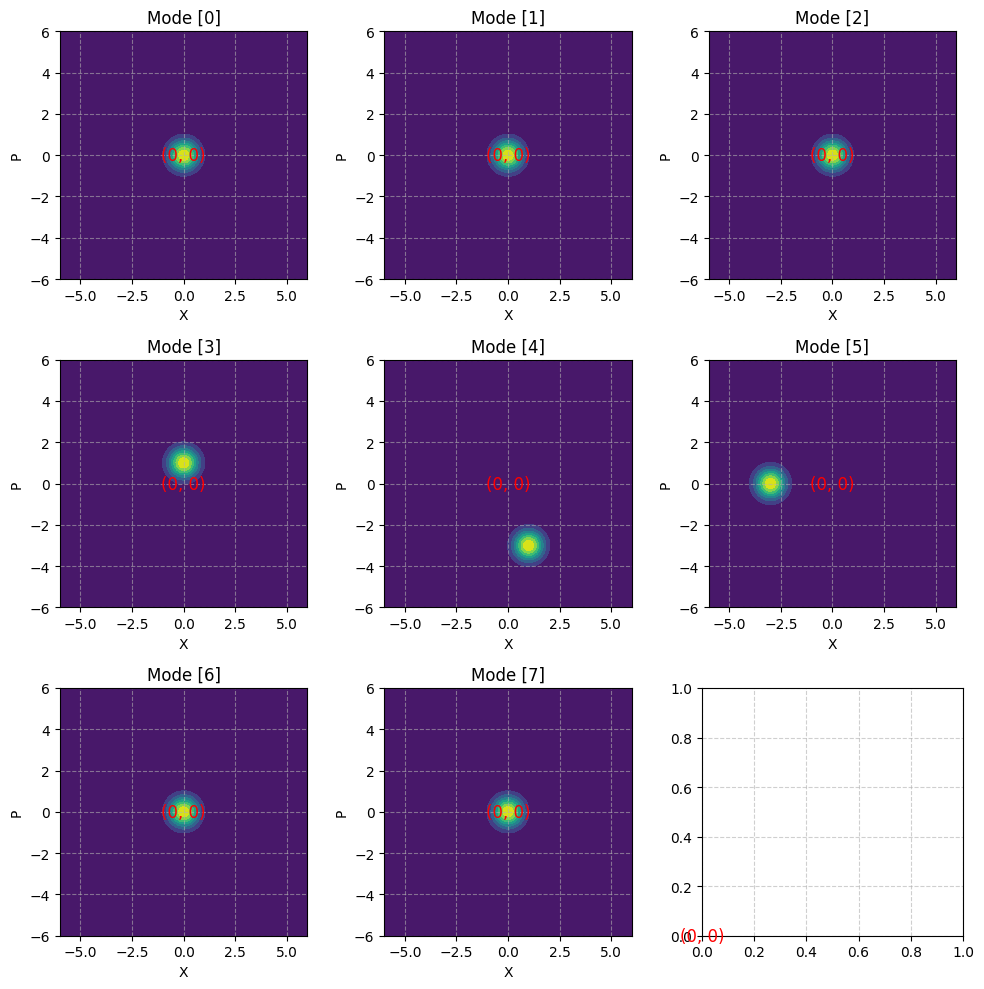

In [6]:
from simphony.quantum import plot_quantum_result
axs = plot_quantum_result(res, include_loss_modes=True)
for ax in axs:
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.text(0, 0, '(0, 0)', fontsize=12, color='red', ha='center', va='center')
plt.tight_layout()
plt.show()

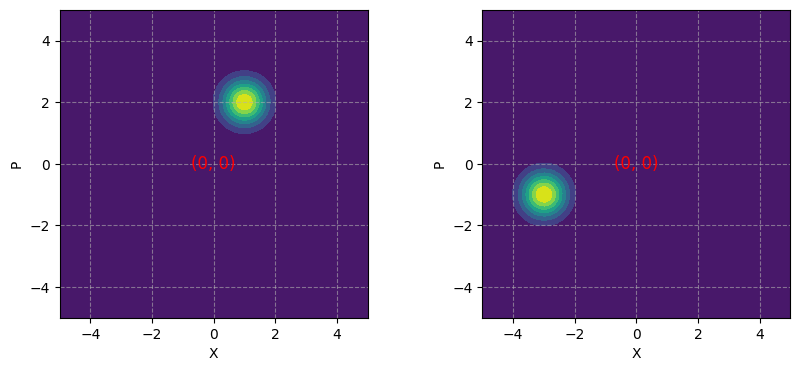

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
qstate.plot_mode(0, x_range=(-5, 5), y_range=(-5, 5), ax=axes[0])
qstate.plot_mode(1, x_range=(-5, 5), y_range=(-5, 5), ax=axes[1])
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.text(0, 0, '(0, 0)', fontsize=12, color='red', ha='center', va='center')
plt.show()

<Axes: xlabel='X', ylabel='P'>

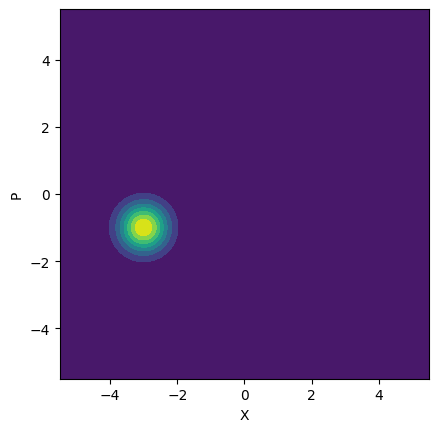

In [8]:
qstate.plot_mode(1)